[The article I am following is here](https://www.datacamp.com/community/tutorials/xgboost-in-python)

#### inspecting the dataset

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
# the methods in sklearn's datasets to view the dataset attributes
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names # column names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### pandas load

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
len(df.columns)
# target is not in the df

13

In [11]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### xgboost start

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

> Now you will convert the dataset into an __optimized data structure__ called Dmatrix that XGBoost supports and gives it acclaimed __performance and efficiency__ gains. You will use this later in the tutorial.

In [14]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [15]:
data_dmatrix

#### xgboost's hyperparameters

    ~ The common parameters you have to know

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like __reg:linear__ for regression problems; __reg:logistic__ for classification problems with only decision, __binary:logistic__ for classification problems with probability.

    ~Other notes on gradient boosting
    
__one__
1. Gradient boosting involves creating and adding trees to the model sequentially.
2. New trees are created to correct the residual errors in the predictions from the existing sequence of trees.
3. The effect is that the model can quickly fit, then overfit the training dataset.

__learning_rate__
1. Naive gradient boosting is the same as gradient boosting with shrinkage where the shrinkage factor is set to 1.0. 
2. Setting values less than 1.0 has the effect of making less corrections for each tree added to the model. 
    
    Zhiwei: I take this to mean that by setting the learning_rate to 1 we are making 100% corrections each time on the error and this is naive becuase this will over fit the training data.

> "A technique to slow down the learning in the gradient boosting model is to apply a weighting factor for the corrections by new trees when added to the model."

Thus the range from 0 to 1 is a weight on how much correction to do with each model.

__max_depth__
1. Another parameter to prevent over-fitting

__subsample__
1. I'm not sure why we would only want to use a percentage of our dataset for each tree. I'm guessing that this has to do with overfitting again. lol. Must be. Don't want to learn from the fully current dataset.

__colsample_bytree__
1. Again another prevention of over fitting parameter. The percentage of features to use.

    ~ regularization parameters 

Zhiwei: lol, to me the above common parameters were regularization parameters alr.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

* __gamma__: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* __alpha__: L1 regularization on leaf weights. A large value leads to more regularization.
* __lambda__: L2 regularization on leaf weights and is smoother than L1 regularization.

---

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

# I'm not sure why they only decided to use 30% of the features and such a low learning rate
# maybe this is the tested and proven way.

# Realize that there isn't a metrics parameter here in the model like in a deep learning model.
# We evaluate it separately using mean_squared_error from sklearn.

In [18]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, preds) # actual vs prediction
mse

110.48927197811797

In [20]:
rmse = np.sqrt(mse)
rmse
# this is the mean error per point. 

10.511387728464685

#### using k-fold cross validation using XGBoost

[XGBoost documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.

In [21]:
# I created my regressor previously using xgb.XGBRegressor but for XGBoost's cross validataion I have to put
# all the parameters into a dictionary and place it into a 'params' parameter.

params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1, 'alpha':10, 'max_depth':5,}


cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[

__early_stopping_rounds__: stops x iterations after marginal improvements or drop in performance on hold out set
    
Thus in the case about we are stopping the training of the model after 10 iterations of marginal improvement of a decrease in performance.

There are some cases where the model performance decreases before increasing again so sometimes it's good to put a higher value for early_stopping_rounds.

[Refer to the comment at this enquiry](https://www.kaggle.com/c/rossmann-store-sales/discussion/16968)

The guy's early stopping rounds are up to the hundreds.

In [22]:
cv_results 
# 50 tree models in a sequence 
# each model is a boost round
# Realize that the results output is in a pandas dataframe

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.652973,0.038276,21.667104,0.071389
1,19.743088,0.092474,19.772359,0.027169
2,17.990501,0.113422,18.073048,0.076570
3,16.491336,0.112586,16.593016,0.106891
4,15.014008,0.102990,15.168027,0.114311
5,13.719764,0.084732,13.888565,0.103325
6,12.568206,0.102255,12.748360,0.122159
7,11.589175,0.091193,11.787017,0.138790
8,10.690314,0.098094,10.899607,0.133871
9,9.835144,0.068089,10.075945,0.094154


### __early_stopping_rounds__: stops x iterations after marginal improvements or drop in performance on hold out set
    
Thus in the case about we are stopping the training of the model after 10 iterations of marginal improvement of a decrease in performance.

There are some cases where the model performance decreases before increasing again so sometimes it's good to put a higher value for early_stopping_rounds.

[Refer to the comment at this enquiry](https://www.kaggle.com/c/rossmann-store-sales/discussion/16968)

The guy's early stopping rounds are up to the hundreds.

In [23]:
cv_results['test-rmse-mean'].tail(1)

49    3.848362
Name: test-rmse-mean, dtype: float64

You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. 

You can reach an even lower RMSE for a different set of hyper-parameters. 

You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

Zhiwei: Just note that there is a search function to help you find the best parameters. 

---

#### Visualize Boosting Trees and Feature Importance

you can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the __plot_tree() function__ along with the number of trees you want to plot using the num_trees argument.

In [24]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[18:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=

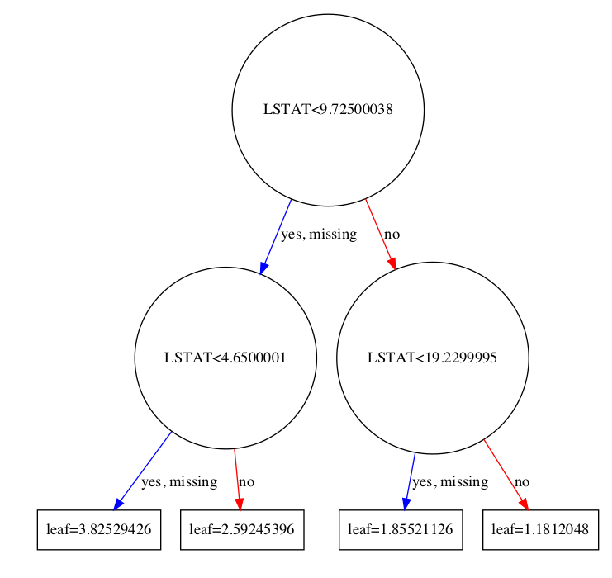

In [31]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg, num_trees=0) # the model # tree index 0
plt.rcParams['figure.figsize'] = [50,10]
plt.show()

__Checking the'colsample_bytree' percentage on this graph does not make sense but w/e__

Since we are only useing 30% of the features let me check if the number shown in the figure is correct relative to the number of features in the dataset.

There are in total 13 features. 30% of 13 is 1.3 x 3 = 3.9 or 4 features.

The only feature I see above is LSTAT. 


But the max_depth for this tree is 2 and we have 2 layers of nodes only so this is correct. 

----

#### Check the importance of each feature

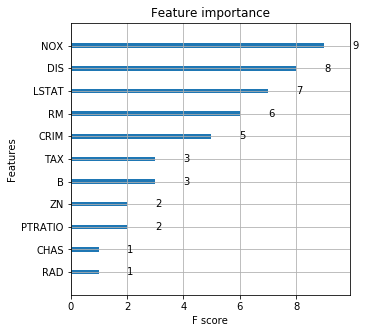

In [42]:
# plot_importance(model)

xgb.plot_importance(xg_reg)
plt.show()

COMMENTS
1. Realize that the feature importance is tested through F score - I'm taking it as F-tset. Probably have to read up about how this is tested.

2. The be able to look at the best features is key. I also have to know which features have the most weight to the prediction. This is good. 

#### conclusion

1. xgregressor on train_test_set (with hyper parameter tuning )
2. Cross validation with (with hyper parameter tuning )
3. Visualizing a chosen tree
4. Feature importance visualizaion. 

#### Next
1. Read up and implement ROC curve 
2. XGBoost classifier since this time was a regressor. 